<a href="https://colab.research.google.com/github/SamarthRajj/Machine_Learning_practice/blob/main/Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classifier using Neural Network on Fashion MNSIT dataset**

In [21]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, Y_train_full), (X_test, Y_test) = fashion_mnist.load_data()

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = Y_train_full[:5000], Y_train_full[5000:]

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


In [16]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])


In [19]:
model.compile(loss = "sparse_categorical_crossentropy",
               optimizer = "sgd",
               metrics = ["accuracy"])

In [20]:
history = model.fit(X_train, y_train, epochs = 30,
                    validation_data =(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 12s 6ms/step - loss: 0.7317 - accuracy: 0.7623 - val_loss: 0.5162 - val_accuracy: 0.8290
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4885 - accuracy: 0.8303 - val_loss: 0.4391 - val_accuracy: 0.8514
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4456 - accuracy: 0.8442 - val_loss: 0.4165 - val_accuracy: 0.8572
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4167 - accuracy: 0.8531 - val_loss: 0.4158 - val_accuracy: 0.8560
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3967 - accuracy: 0.8608 - val_loss: 0.3827 - val_accuracy: 0.8672
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3788 - accuracy: 0.8667 - val_loss: 0.3718 - val_accuracy: 0.8696
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3652 - accuracy: 0.8704 - val_loss: 0.3567 - val_accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

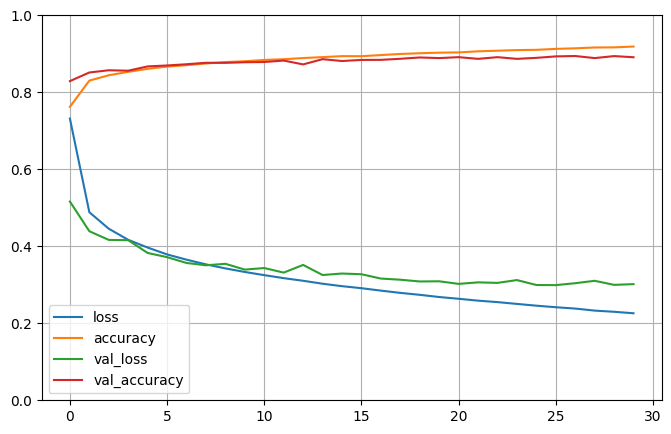

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show

In [ ]:
model.evaluate(X_test, Y_test)

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)
